In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns
%matplotlib inline

**Dataset loading and pre-processing**

In [ ]:
filename = '/content/Tumor_Cancer_Prediction_Data.csv'
data = pd.read_csv(filename, index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 1 to 455
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F1         455 non-null    float64
 1   F2         455 non-null    float64
 2   F3         455 non-null    float64
 3   F4         455 non-null    float64
 4   F5         455 non-null    float64
 5   F6         455 non-null    float64
 6   F7         455 non-null    float64
 7   F8         455 non-null    float64
 8   F9         455 non-null    float64
 9   F10        455 non-null    float64
 10  F11        455 non-null    float64
 11  F12        455 non-null    float64
 12  F13        455 non-null    float64
 13  F14        455 non-null    float64
 14  F15        455 non-null    float64
 15  F16        455 non-null    float64
 16  F17        455 non-null    float64
 17  F18        455 non-null    float64
 18  F19        455 non-null    float64
 19  F20        455 non-null    float64
 20  F21       

In [ ]:
data.isnull().any()

F1           False
F2           False
F3           False
F4           False
F5           False
F6           False
F7           False
F8           False
F9           False
F10          False
F11          False
F12          False
F13          False
F14          False
F15          False
F16          False
F17          False
F18          False
F19          False
F20          False
F21          False
F22          False
F23          False
F24          False
F25          False
F26          False
F27          False
F28          False
F29          False
F30          False
diagnosis    False
dtype: bool

In [ ]:
#In case we had Nulls this line is to check their number and drop all of them
data.isnull().sum()
data=data.dropna()
#Drop duplicates
data=data.drop_duplicates()

In [ ]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.008043,10.05,17.53,64.41,0.02100,0.10070,0.1402,0.07326,0.02511,0.01690,0.01775,0.01449,0.07664,0.1890,0.06331,384.0,0.2619,0.2894,0.14020,2.0150,1.778,16.85,0.007803,0.1055,0.002778,11.16,26.84,71.98,310.8,0.06499,B
2,0.010450,10.80,21.98,68.79,0.01844,0.08801,0.1303,0.05743,0.03614,0.02991,0.01404,0.02148,0.07662,0.2016,0.05977,489.5,0.3077,0.2965,0.16960,1.6210,2.240,20.20,0.006543,0.1927,0.002690,12.76,32.04,83.69,359.9,0.07485,B
3,0.008747,16.14,14.86,104.30,0.01500,0.09495,0.1206,0.08501,0.05500,0.01831,0.04528,0.01246,0.07012,0.1735,0.05875,947.9,0.2387,0.2778,0.17220,0.6372,1.729,21.83,0.003958,0.2310,0.001621,17.71,19.58,115.90,800.0,0.11290,B
4,0.015190,12.18,17.84,77.79,0.02220,0.10450,0.1140,0.07057,0.02490,0.01131,0.02941,0.01179,0.07376,0.1900,0.06635,495.2,0.3661,0.2227,0.09358,1.5110,2.410,24.44,0.005433,0.0498,0.003408,12.83,20.92,82.14,451.1,0.05882,B
5,0.004551,12.25,22.44,78.18,0.01608,0.08192,0.1256,0.05200,0.01714,0.00941,0.01261,0.01205,0.08203,0.1544,0.05976,622.9,0.2239,0.3100,0.18040,1.1390,1.577,18.04,0.005096,0.1230,0.002399,14.17,31.99,92.74,466.5,0.06335,B


In [ ]:
X = data.drop(['diagnosis' ], axis = 1)
Y = data['diagnosis']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


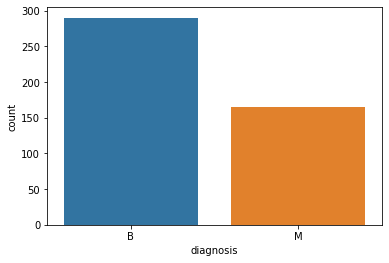

In [ ]:
sns.countplot(Y, label='count')

In [ ]:
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [ ]:
#mapped to 0s and 1s
Y.view()

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 20)

**Model evaluation funtion**

In [ ]:
def evaluate_model(Y_pred_model):
        cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_model)
        cnf_matrix
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model))
        print("Precision:",metrics.precision_score(Y_test, Y_pred_model))
        print("Recall:",metrics.recall_score(Y_test, Y_pred_model))

**1-SVM Model**

In [ ]:
#normalization
scaler = MinMaxScaler()
X_train_Normalized = scaler.fit_transform(X_train)
X_test_Normalized = scaler.fit_transform(X_test)

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 45)
classifier.fit(X_train_Normalized, Y_train)
Y_pred_SVM = classifier.predict(X_test_Normalized)

Accuracy: 0.9736842105263158
Precision: 0.9387755102040817
Recall: 1.0


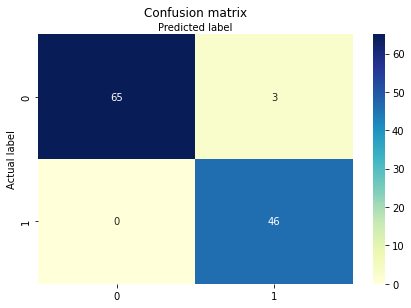

In [ ]:
evaluate_model(Y_pred_SVM)

**2-KNN**

In [ ]:
val_acc = []
acc = []

for i in range(1,51):
  K_NN_model = KNeighborsClassifier(n_neighbors=i, weights='distance')
  K_NN_model.fit(X_train_Normalized,Y_train)
  Y_pred_K_NN = K_NN_model.predict(X_test_Normalized)
  acc.append(accuracy_score(Y_test, Y_pred_K_NN))
  K_acc = cross_val_score(K_NN_model, X_train_Normalized, Y_train, cv = 10, scoring =    'accuracy')
  val_acc.append(K_acc.mean())

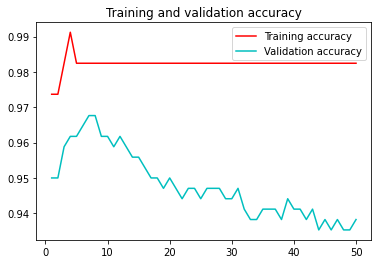

In [ ]:
plt.plot(range(1,51), acc, 'r', label='Training accuracy')
plt.plot(range(1,51), val_acc, 'c', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

K equal 7
Validation: 0.9676470588235295
Accuracy: 0.9824561403508771
Precision: 0.9583333333333334
Recall: 1.0


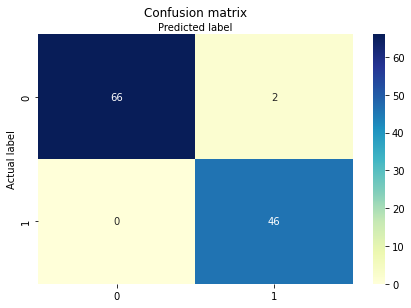

In [ ]:
diff = 100

for i in range(50):
  if abs(acc[i] - val_acc[i]) < diff:
    diff = abs(acc[i] - val_acc[i])
    k = i + 1
    ideal_acc = acc[i]
    ideal_val = val_acc[i]

print("K equal {}".format(k))
print("Validation: {}".format(ideal_val))
evaluate_model(Y_pred_K_NN)

**3-decision Tree**

Accuracy: 0.956140350877193
Precision: 0.9767441860465116
Recall: 0.9130434782608695


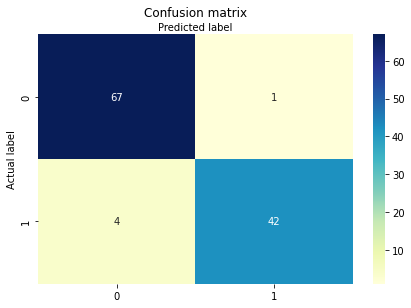

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=3)

dt.fit(X_train, Y_train)
# Predict test set labels
Y_pred_DT = dt.predict(X_test)

acc = accuracy_score(Y_test, Y_pred_DT)
evaluate_model(Y_pred_DT)

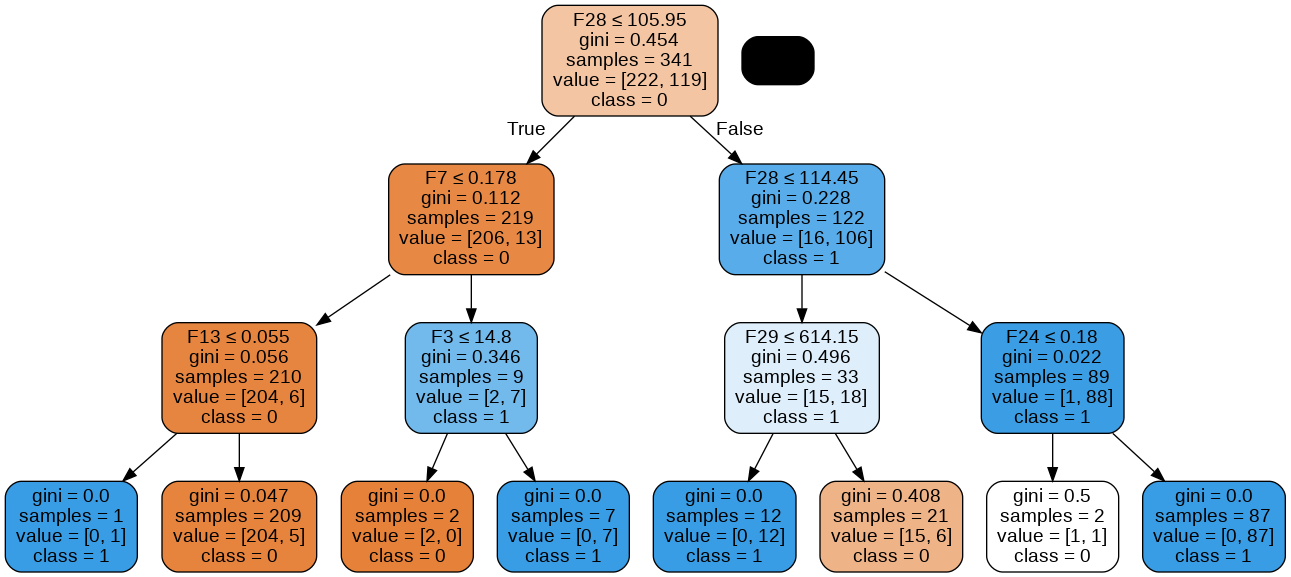

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

**4-Naive bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred_gnb=gnb.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred_gnb)
TP=cm[1][1]
TN=cm[0][0]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('Testing accuracy= ',(TP+TN)/(TP+TN+FN+FP))
print('Precision= ',(TP)/(TP+FP))
print('Recall= ',(TP)/(TP+FN)) 

[[66  2]
 [ 2 44]]
Testing accuracy=  0.9649122807017544
Precision=  0.9565217391304348
Recall=  0.9565217391304348


**5-Logistic Regression**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


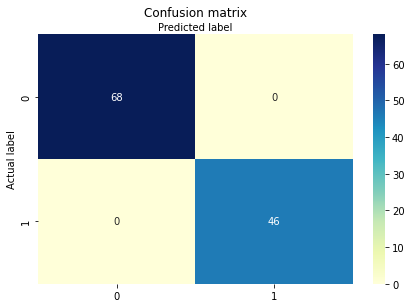

In [ ]:
#Standarlization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)
#Parameter named C is regularization value
model=LogisticRegression(C=1,random_state=5893,fit_intercept = False)
model.fit(X_train, Y_train)
y_pred_logistic = model.predict(X_test)
evaluate_model(y_pred_logistic)